In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

housing = pd.DataFrame(pd.read_csv("Housing.csv"))

print('housing shape:', housing.shape)
housing.head()

housing shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing['furnishingstatus'] = housing['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [9]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
train = df_train.to_numpy()
test = df_test.to_numpy()
X_train = train[:,1:]
y_train = train[:,0]/1000
X_test = test[:,1:]
y_test = test[:,0]/1000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
feature_min = scaler.data_min_
feature_max = scaler.data_max_
feature_range = scaler.data_range_
X_test_scaled = (X_test - feature_min) / feature_range

In [11]:
def gradient_descent(alpha, x, y, numIterations):
    cost = []
    m = x.shape[0]
    x0 = np.ones(m).reshape((m, 1))
    x = np.concatenate((x0, x), axis=1)
    theta = np.ones(x.shape[1])
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(x_transpose, loss) / m
        theta = theta - alpha * gradient
        cost.append(J)
    return theta, cost

In [12]:
theta, cost = gradient_descent(alpha = 0.01, x = X_train_scaled, y = y_train, numIterations = 1000)

theta

array([1642.2387646 , 1050.74095905,  868.19179747, 1191.08276474,
       1043.3553213 , 1044.96981232,  436.79197195,  336.55919324,
        526.10034271,  931.79024411,  788.86177142,  700.26275169,
        611.71002612])

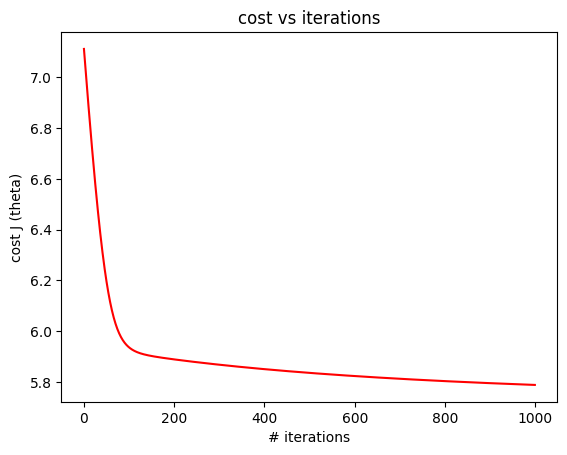

In [13]:
plt.plot(np.log10(cost), color='red')
plt.title('cost vs iterations')
plt.xlabel('# iterations')
plt.ylabel('cost J (theta)')
plt.show()

In [14]:
def predict(x, theta):
    m = x.shape[0]
    x0 = np.ones(m).reshape((m, 1))
    x = np.concatenate((x0, x), axis=1)
    return np.dot(x, theta)
y_test_pred = predict(X_test_scaled, theta)
print("Area     #ofbds   realprice  predict from Linear reg ")
for i in range(0, len(X_test_scaled)):
    t = X_test[i]
    print("{0:8.2f}, {1:8.2f}, {2:8.2f}, {3:8.2f}".format(t[0], t[1], y_test[i], y_test_pred[i]))

Area     #ofbds   realprice  predict from Linear reg 
 2880.00,     3.00,  4403.00,  4484.92
 6000.00,     3.00,  7350.00,  6300.22
10269.00,     3.00,  5250.00,  5083.29
 5320.00,     3.00,  4550.00,  5483.88
 4950.00,     4.00,  4382.00,  5081.48
 4320.00,     3.00,  4690.00,  4270.28
 6540.00,     4.00,  8540.00,  8129.41
 6540.00,     4.00,  5250.00,  4779.07
 6800.00,     2.00,  2730.00,  3319.83
 6540.00,     3.00,  5950.00,  6080.66
 5640.00,     2.00,  3675.00,  2473.46
 5700.00,     3.00,  6650.00,  6934.78
 2787.00,     4.00,  2380.00,  4851.09
15600.00,     3.00,  5943.00,  6070.69
 5136.00,     3.00,  5600.00,  6092.80
 4410.00,     4.00,  4970.00,  6153.31
 7500.00,     4.00, 12215.00,  8044.34
 4075.00,     3.00,  4340.00,  4846.62
 6550.00,     3.00,  7875.00,  6398.46
 3700.00,     4.00,  5950.00,  5708.55
 4500.00,     3.00,  3143.00,  4560.38
 4100.00,     4.00,  3990.00,  2709.05
 3162.00,     3.00,  4473.00,  5311.33
 6000.00,     2.00,  2870.00,  3551.71
 3060.00, 

In [15]:
## Begin HW 3
##Suppose you have m=100 training examples with n=5 features and would learn a linear regression model to directly fit the dataset.
##According to the notations in this chapter, what are the dimensions of theta, X, and Y?
n = 5
m = 100
print("theta: (1, n+1) = (1, 6)")
print("X: (m, n+1) = (100, 6)")
print("Y: (m, 1) = (100, 1)")


theta: (1, n+1) = (1, 6)
X: (m, n+1) = (100, 6)
Y: (m, 1) = (100, 1)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

##Suppose you train a linear regression to fit the dataset (x,y) in
##Fig.2.4(a), which can be generated by the following statements:

## #Fixing random state for reporducibility
## np.random.seed(1968)
## x = np.random.rand(10)
## y = 4 + 6 * x + np.random.randn(10)
## Plot the first 5 learned lines for the first five iterations together with the data samples.
## Since different initial values of theta can lead to different results,
## you are asked to repeat the excercise using two different initial values of theta.



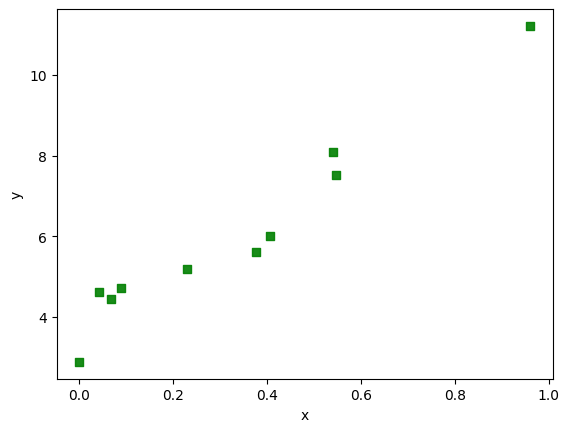

In [20]:
np.random.seed(1968)
x = np.random.rand(10)
y = 4 + 6 * x + np.random.randn(10)

plt.scatter(x, y, alpha=0.9, color='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
theta1 = 1
theta2 = 1
alpha = 0.5
theta_ones = []
theta_zeros = []
theta_ones.append(theta1)
theta_zeros.append(theta2)
for i in range(0,5):
    error = theta1 + theta2 * x - y
    theta1 = theta1 - alpha * statistics.mean(error)
    theta2 = theta2 - alpha * statistics.mean(error * x)
    theta_zeros.append(theta1)
    theta_ones.append(theta2)

print("theta_ones:", theta_ones)
print("theta_zeros:", theta_zeros)

theta_ones: [1, np.float64(2.0390049292216794), np.float64(2.596498569598725), np.float64(2.9372588538555178), np.float64(3.178614607651646), np.float64(3.3726260993061152)]
theta_zeros: [1, np.float64(3.3526417631123033), np.float64(4.35960128326229), np.float64(4.772207670888256), np.float64(4.9229657714762105), np.float64(4.959003007408687)]


In [24]:
theta1 = 0
theta2 = 0
alpha = 0.5
theta_ones = []
theta_zeros = []
theta_ones.append(theta1)
theta_zeros.append(theta2)
for i in range(0,5):
    error = theta1 + theta2 * x - y
    theta1 = theta1 - alpha * statistics.mean(error)
    theta2 = theta2 - alpha * statistics.mean(error * x)
    theta_zeros.append(theta1)
    theta_ones.append(theta2)

print("theta_ones:", theta_ones)
print("theta_zeros:", theta_zeros)

theta_ones: [0, np.float64(1.296351144831031), np.float64(1.97884041197748), np.float64(2.385605691302347), np.float64(2.6664613953540326), np.float64(2.8878610874313204)]
theta_zeros: [0, np.float64(3.015645187487811), np.float64(4.312158105431149), np.float64(4.849166476758416), np.float64(5.051366528975036), np.float64(5.106686113567528)]


In [ ]:
## Generate an artificial dataset based on a linear model, 
## and then learn the model using gradient descent.
## Specifically, 1) generate 100 training examples (x^((i) ),y^((i) )),i=1,2,…,100
## which are randomly drawn from the model y=a+bx+N(0,1) where a and b are constants,
## (say, a=1, b=2), 0≤x≤2, N(0,1) is a random number of Gaussian distribution with mean=0
## and variance=1. Plot a 2D scatterplot for your generated data examples. 
## Please note that sampling on x should be uniformly random.

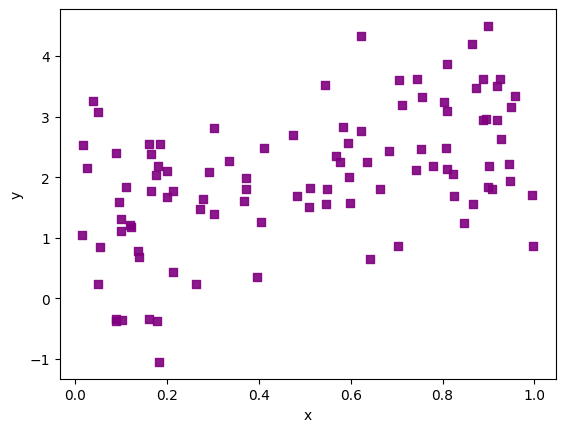

In [26]:
np.random.seed(1969)
x = np.random.rand(100)
a = 1
b = 2
y = a + b * x + np.random.randn(100)

plt.scatter(x, y, alpha=0.9, color='purple', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
theta1=1
theta2=1
alpha=0.5   # we select 0.5 for learning rate
m = x.shape[0]
loss = []
for i in range (0,100):
    error=theta1+theta2*x-y
    temp0=theta1-alpha*statistics.mean(error)
    temp1=theta2-alpha*statistics.mean(error*x)
    theta1=temp0
    theta2=temp1
    J=sum((theta1+theta2*x-y)**2)/(2*m) 
    loss.append(J)

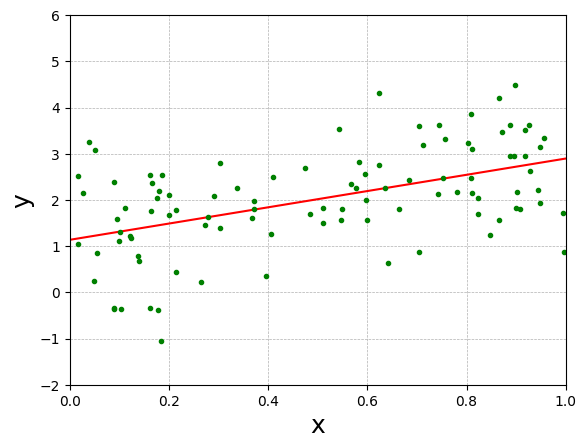

In [34]:
x_new=np.array([0,1])
y_predict=theta2*x_new+theta1
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"g.")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlim([0,1])
plt.ylim([-2,6])
plt.show()

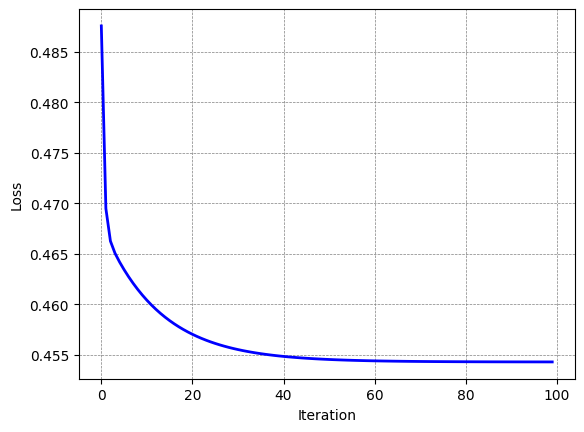

In [35]:
plt.plot(loss, color='blue', linestyle='-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

In [36]:
print(theta1, theta2)

1.136552037731441 1.7593341148217818
